##### 4. To what extent central bank/government influence the macro-economy

In [1]:
from fredapi import Fred
import matplotlib.pyplot as plt
import pandas as pd
import os

In [5]:
fred_data = Fred(api_key=os.environ.get('FRED_API_KEY'))

###### Central bank can influence the economy through interest rates. This will be the measure that i will be looking at.

In [8]:
def to_dataframe(series_object, column_name):
   
    df = pd.DataFrame(data=series_object, columns=column_name)
    df['date'] = df.index
    df.reset_index(drop=True, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

    return df

In [11]:
def plot_data(df,column_name):
    
    plt.figure(figsize=(10,3))
    plt.plot(df['date'],df[column_name],'r')
    plt.title(column_name)

    return plt

In [6]:
#fedfundsrate

fedfunds = fred_data.get_series('FEDFUNDS')

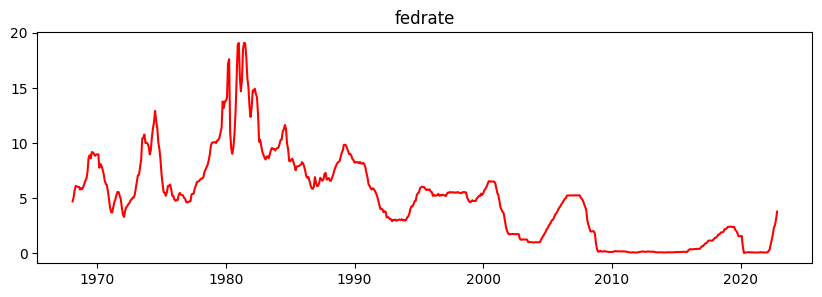

In [31]:
fedfunds_df = to_dataframe(fedfunds,column_name=['fedrate'])
new_fed = fedfunds_df.loc[fedfunds_df['date']>='1967-12-01'].copy()
plt = plot_data(new_fed[2:],column_name='fedrate')
plt.show()

In [14]:
#cpi data

cpi = fred_data.get_series('CORESTICKM159SFRBATL')

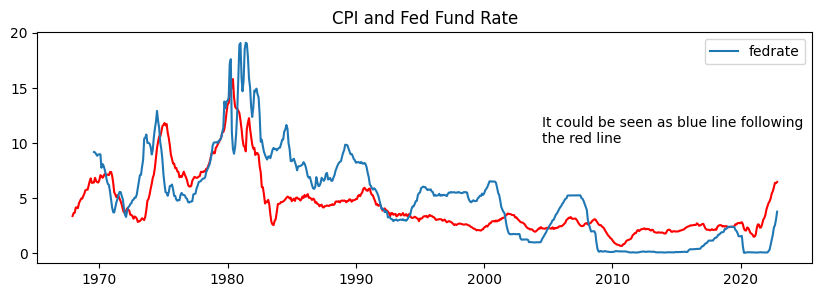

In [48]:
cpi_df = to_dataframe(cpi,column_name=['cpi'])
plt = plot_data(cpi_df,column_name='cpi')
plt.plot(new_fed['date'].iloc[20:],new_fed['fedrate'].iloc[20:],label='fedrate')
plt.text(new_fed['date'][600],y=10,s=f'It could be seen as blue line following \nthe red line')
plt.title('CPI and Fed Fund Rate')
plt.legend(loc='upper right')

plt.show()

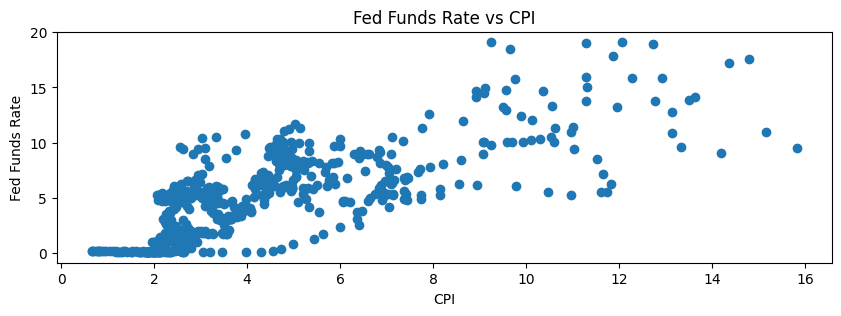

In [27]:
plt.figure(figsize=(10,3))
plt.plot(cpi_df['cpi'],new_fed['fedrate'],'o')
plt.xlabel('CPI')
plt.ylabel('Fed Funds Rate')
plt.title('Fed Funds Rate vs CPI')
plt.show()

##### In the above chart, the maximum number of observations are to the left where, CPI is between 0-8 and fed funds rate is between 0-11. This tends to show the causation. to the right as the CPI increases the fed fund rates are also increased. fed funds rate being can be attributed to the inflation slow down period and also fed rates coming down slowly. fed funds rate depend on the inflation. it is a causation not a correlation.

In [49]:
#Indprod 

indprod = fred_data.get_series('INDPRO')

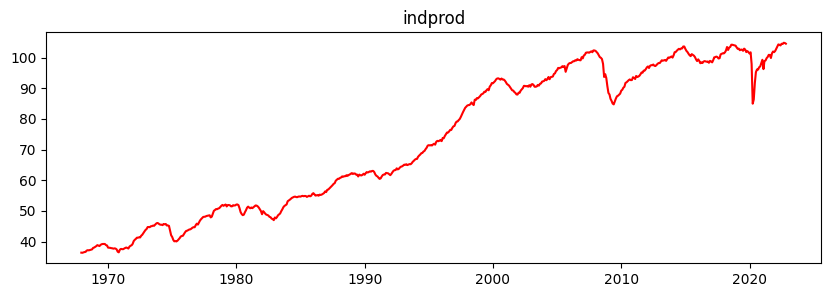

In [88]:
ind_df = to_dataframe(indprod,column_name=['indprod'])
new_ind = ind_df.loc[ind_df['date']>='1967-12-01'].copy()
plt = plot_data(new_ind,column_name='indprod')
plt.show()

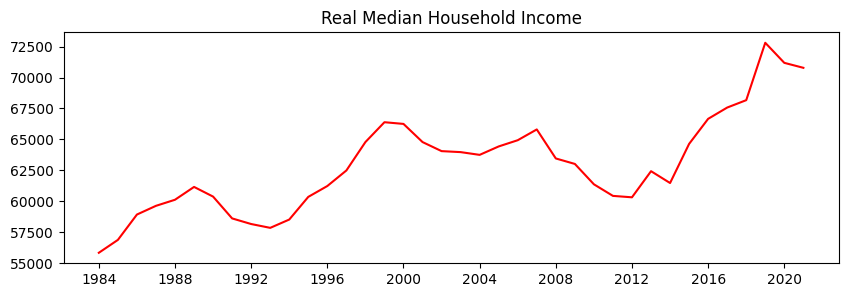

In [58]:
# real median household income

rhincome = fred_data.get_series('MEHOINUSA672N')

rm = to_dataframe(rhincome,column_name=['income'])
plt = plot_data(rm,column_name='income')
plt.title('Real Median Household Income')
plt.show()

###### I have not considered the house sales here because of the bubble in early 2000s. This would be a deception if house sales is considered. There were loans given without any verification and low interests so, the increase in house sales in that period.

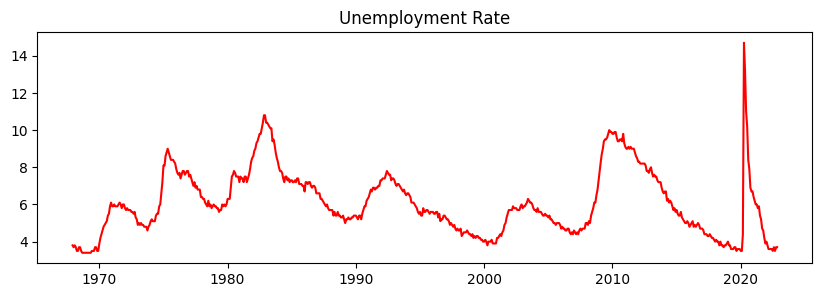

In [61]:
#unemployment 

unemp = fred_data.get_series('UNRATE')

unemp_df = to_dataframe(unemp,column_name=['unrate'])
new_unemp = unemp_df.loc[unemp_df['date']>='1967-12-01'].copy()
plt = plot_data(new_unemp,column_name='unrate')
plt.title('Unemployment Rate')
plt.show()

In [62]:
#real gdp

gdp = fred_data.get_series('GDPC1')

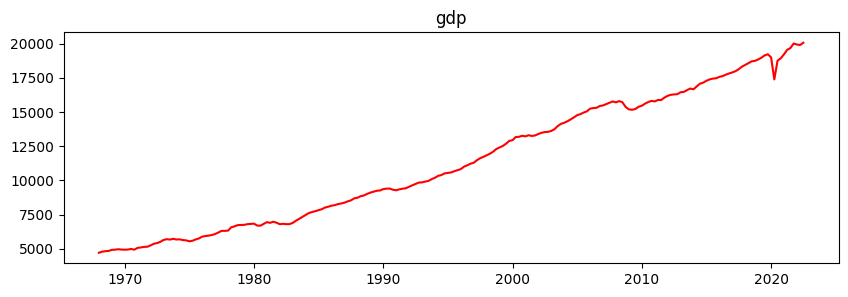

In [65]:
gdp_df = to_dataframe(series_object=gdp,column_name=['gdp'])
new_gdp = gdp_df.loc[gdp_df['date']>='1967-12-01'].copy()
plt = plot_data(new_gdp,column_name='gdp')
plt.show()

In [66]:
# motor vehicle sales

veh_sales = fred_data.get_series('DAUTOSAAR')

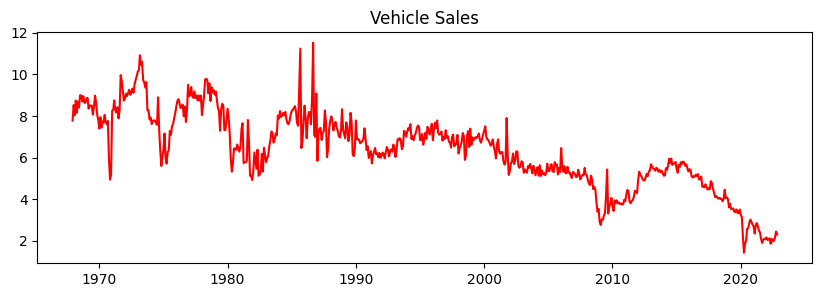

In [70]:
vehsales_df = to_dataframe(series_object=veh_sales,column_name=['vsales'])
new_vsalesdf = vehsales_df.loc[vehsales_df['date']>='1967-12-01'].copy()
plt = plot_data(new_vsalesdf,column_name='vsales')
plt.title("Vehicle Sales")
plt.show()

In [213]:
fed_funds_1968 = fedfunds_df.loc[fedfunds_df['year']>=1968][['date','fedrate']].copy()
fed_funds_1968.reset_index(drop=True,inplace=True)

cpi_1968 = cpi_df.loc[cpi_df['year']>=1968]['cpi'].copy()
cpi_1968.reset_index(drop=True,inplace=True)

ind_1968 = ind_df.loc[ind_df['year']>=1968]['indprod'].copy()
ind_1968.reset_index(drop=True,inplace=True)

rm_1968 = rm.loc[rm['year']>=1968]['income'].copy()
rm_1968.reset_index(drop=True,inplace=True)

unemp_1968 = unemp_df.loc[unemp_df['year']>=1968]['unrate'].copy()
unemp_1968.reset_index(drop=True,inplace=True)

gdp_1968 = gdp_df.loc[gdp_df['year']>=1968]['gdp'].copy()
gdp_1968.reset_index(drop=True, inplace=True)

vsales_1968 = vehsales_df.loc[vehsales_df['year']>=1968]['vsales'].copy()
vsales_1968.reset_index(drop=True,inplace=True)

In [214]:
def normalise(value,maximum,minimum):
    
    normalised = ((value - minimum) / (maximum-minimum))
    normalised = normalised*20

    return normalised

In [215]:
ind_1968 = ind_1968.apply(normalise, maximum = max(ind_1968), minimum = min(ind_1968))
rm_1968 = rm_1968.apply(normalise,maximum = max(rm_1968), minimum = min(rm_1968))
gdp_1968 = gdp_1968.apply(normalise,maximum = max(gdp_1968), minimum = min(gdp_1968))

In [219]:
rm_1968

0      0.000000
1      1.228504
2      3.641932
3      4.471143
4      5.049470
5      6.272085
6      5.349823
7      3.273263
8      2.738516
9      2.373380
10     3.164900
11     5.323910
12     6.356890
13     7.839812
14    10.545347
15    12.434629
16    12.273263
17    10.542992
18     9.680801
19     9.586572
20     9.325088
21    10.128386
22    10.720848
23    11.746761
24     8.983510
25     8.460542
26     6.520612
27     5.418139
28     5.282686
29     7.770318
30     6.643110
31    10.368669
32    12.755006
33    13.831567
34    14.534747
35    20.000000
36    18.089517
37    17.616019
Name: income, dtype: float64

In [216]:
final_df = pd.DataFrame(data=None)
final_df = pd.concat([fed_funds_1968,cpi_1968,ind_1968,rm_1968,unemp_1968,gdp_1968,
vsales_1968],axis=1)

In [217]:
final_df.columns

Index(['date', 'fedrate', 'cpi', 'indprod', 'income', 'unrate', 'gdp',
       'vsales'],
      dtype='object')

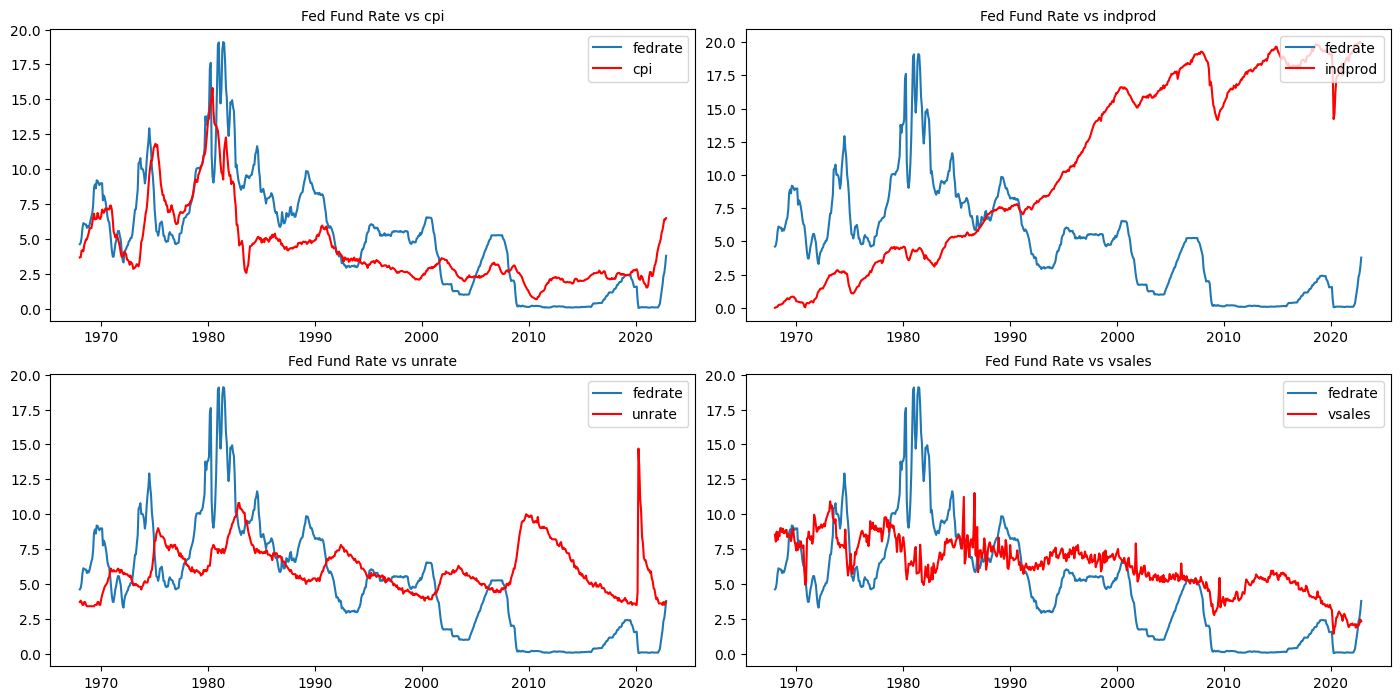

In [243]:
columns = [column for column in final_df.columns][2:].copy()

plt.figure(figsize=(14,7))

i=1
for index,column in enumerate(columns):       
        
    if (index !=2) and (index!=4):
        plt.subplot(2,2,i)
        plt.plot(final_df['date'],final_df['fedrate'],label='fedrate')
        plt.plot(final_df['date'],final_df[column],'r',label=column)
        plt.title(f'Fed Fund Rate vs {column}',fontsize=10)
        plt.legend(loc='upper right')
        plt.tight_layout(pad=0.7)

        i=i+1

plt.show()